# Nutri-Score's Unbelievable Power to Detect Junk Food

In this project, the goal is to discover ways to detect junk food using nutrition attributes, in other words nutrition facts. After digging through Kaggle and Google searches, I stumbled upon a Kaggle dataset called "USDA Food Composition Databases" that contained over 7000 unique foods and their respective nutrition attributes. And with this dataset, I embarked on a journey to explore, draw conclusions on, and develop ways to detect junk food.

Kaggle dataset here: https://www.kaggle.com/datasets/econdata/usda-food-composition-databases

# Data Cleaning and Preparation

In [1]:
import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
nutrients = Table.read_table("USDA.csv")

In [3]:
nutrients

ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
1001,"BUTTER,WITH SALT",717,0.85,81.11,0.06,714,51.368,215,0.06,24,0.02,24,0,2.32,1.5
1002,"BUTTER,WHIPPED,WITH SALT",717,0.85,81.11,0.06,827,50.489,219,0.06,24,0.16,26,0,2.32,1.5
1003,"BUTTER OIL,ANHYDROUS",876,0.28,99.48,0,2,61.924,256,0,4,0,5,0,2.8,1.8
1004,"CHEESE,BLUE",353,21.4,28.74,2.34,1395,18.669,75,0.5,528,0.31,256,0,0.25,0.5
1005,"CHEESE,BRICK",371,23.24,29.68,2.79,560,18.764,94,0.51,674,0.43,136,0,0.26,0.5
1006,"CHEESE,BRIE",334,20.75,27.68,0.45,629,17.41,100,0.45,184,0.5,152,0,0.24,0.5
1007,"CHEESE,CAMEMBERT",300,19.8,24.26,0.46,842,15.259,72,0.46,388,0.33,187,0,0.21,0.4
1008,"CHEESE,CARAWAY",376,25.18,29.2,3.06,690,18.584,93,nan,673,0.64,93,0,nan,nan
1009,"CHEESE,CHEDDAR",403,24.9,33.14,1.28,621,21.092,105,0.52,721,0.68,98,0,0.29,0.6
1010,"CHEESE,CHESHIRE",387,23.37,30.6,4.78,700,19.475,103,nan,643,0.21,95,0,nan,nan


Before I clean and prepare the data, I first need to analyze the data to have a clear idea of what I am working with. After understanding the data, this is what I found:

* The USDA food composition dataset, `nutrients`, contains 7058 rows.
* All nutrition attributes (float) are in 100-gram amounts.
* Several food entries contain at least one NaN (not a number).
* The nutrition attributes could be used to help categorize foods (junk vs. non-junk).

The first step in the data cleaning and preparation process is to take care of the NaNs. Most of the time, NaNs are used when a value is undefined, unknown, or is an extremely small float. In this scenario, it is impractical to go through each entry and search for its nutrition contents to possibly obtain an exact measurement. Thus, I will replace all NaNs with 0 by defining a function that takes in a column as its arugment and returns an updated column with no NaNs.

In [4]:
def no_nan(col_name):
    """
    Iterate through each element of a column,
    replacing NaNs with 0 and keeping non-NaN values.
    """
    new_col = []
    for i in nutrients.column(col_name):
        if np.isnan(i):
            new_col.append(0.0)
        else:
            new_col.append(i)
    return np.array(new_col)

After defining `no_nan`, I will apply this function to all of the nutrition attributes in the dataset. Once all of the nutrition attributes are updated with no NaNs, I will replace the old columns with the updated columns to create the dataset that will be used for later stages of analyses, `new_nutrients`.

In [5]:
# Update all nutrition attributes using the no_nan function
new_calo = no_nan("Calories")
new_prot = no_nan("Protein")
new_tf = no_nan("TotalFat")
new_carb = no_nan("Carbohydrate")
new_sod = no_nan("Sodium")
new_sf = no_nan("SaturatedFat")
new_chol = no_nan("Cholesterol")
new_sug = no_nan("Sugar")
new_calc = no_nan("Calcium")
new_iron = no_nan("Iron")
new_pot = no_nan("Potassium")
new_vitc = no_nan("VitaminC")
new_vite = no_nan("VitaminE")
new_vitd = no_nan("VitaminD")

# Replace the old columns with the updated nutrition attributes
new_nutrients = nutrients.with_columns(
    "Calories", new_calo,
    "Protein", new_prot,
    "TotalFat", new_tf,
    "Carbohydrate", new_carb,
    "Sodium", new_sod,
    "SaturatedFat", new_sf,
    "Cholesterol", new_chol,
    "Sugar", new_sug,
    "Calcium", new_calc,
    "Iron", new_iron,
    "Potassium", new_pot,
    "VitaminC", new_vitc,
    "VitaminE", new_vite,
    "VitaminD", new_vitd
)

new_nutrients

ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
1001,"BUTTER,WITH SALT",717,0.85,81.11,0.06,714,51.368,215,0.06,24,0.02,24,0,2.32,1.5
1002,"BUTTER,WHIPPED,WITH SALT",717,0.85,81.11,0.06,827,50.489,219,0.06,24,0.16,26,0,2.32,1.5
1003,"BUTTER OIL,ANHYDROUS",876,0.28,99.48,0,2,61.924,256,0,4,0,5,0,2.8,1.8
1004,"CHEESE,BLUE",353,21.4,28.74,2.34,1395,18.669,75,0.5,528,0.31,256,0,0.25,0.5
1005,"CHEESE,BRICK",371,23.24,29.68,2.79,560,18.764,94,0.51,674,0.43,136,0,0.26,0.5
1006,"CHEESE,BRIE",334,20.75,27.68,0.45,629,17.41,100,0.45,184,0.5,152,0,0.24,0.5
1007,"CHEESE,CAMEMBERT",300,19.8,24.26,0.46,842,15.259,72,0.46,388,0.33,187,0,0.21,0.4
1008,"CHEESE,CARAWAY",376,25.18,29.2,3.06,690,18.584,93,0,673,0.64,93,0,0,0
1009,"CHEESE,CHEDDAR",403,24.9,33.14,1.28,621,21.092,105,0.52,721,0.68,98,0,0.29,0.6
1010,"CHEESE,CHESHIRE",387,23.37,30.6,4.78,700,19.475,103,0,643,0.21,95,0,0,0


This is the final step of the data cleaning and preparation process. To categorize each food into a junk food or non-junk food category, I should utilize the given nutrition attributes. With this in mind, I searched for a formula that is recognized by health and nutrition experts and similarly uses the types of nutrition attributes present in the dataset in 100-gram amounts. My search led me to the Nutri-Score formula, a simple nutritional rating system developed by the UK Food Standards Agency. Finally, I turned this formula into a function that mostly consists of if-statements that eventually lead to: negative - positive = score.

More information about Nutri-Score here: https://en.wikipedia.org/wiki/Nutri-Score.

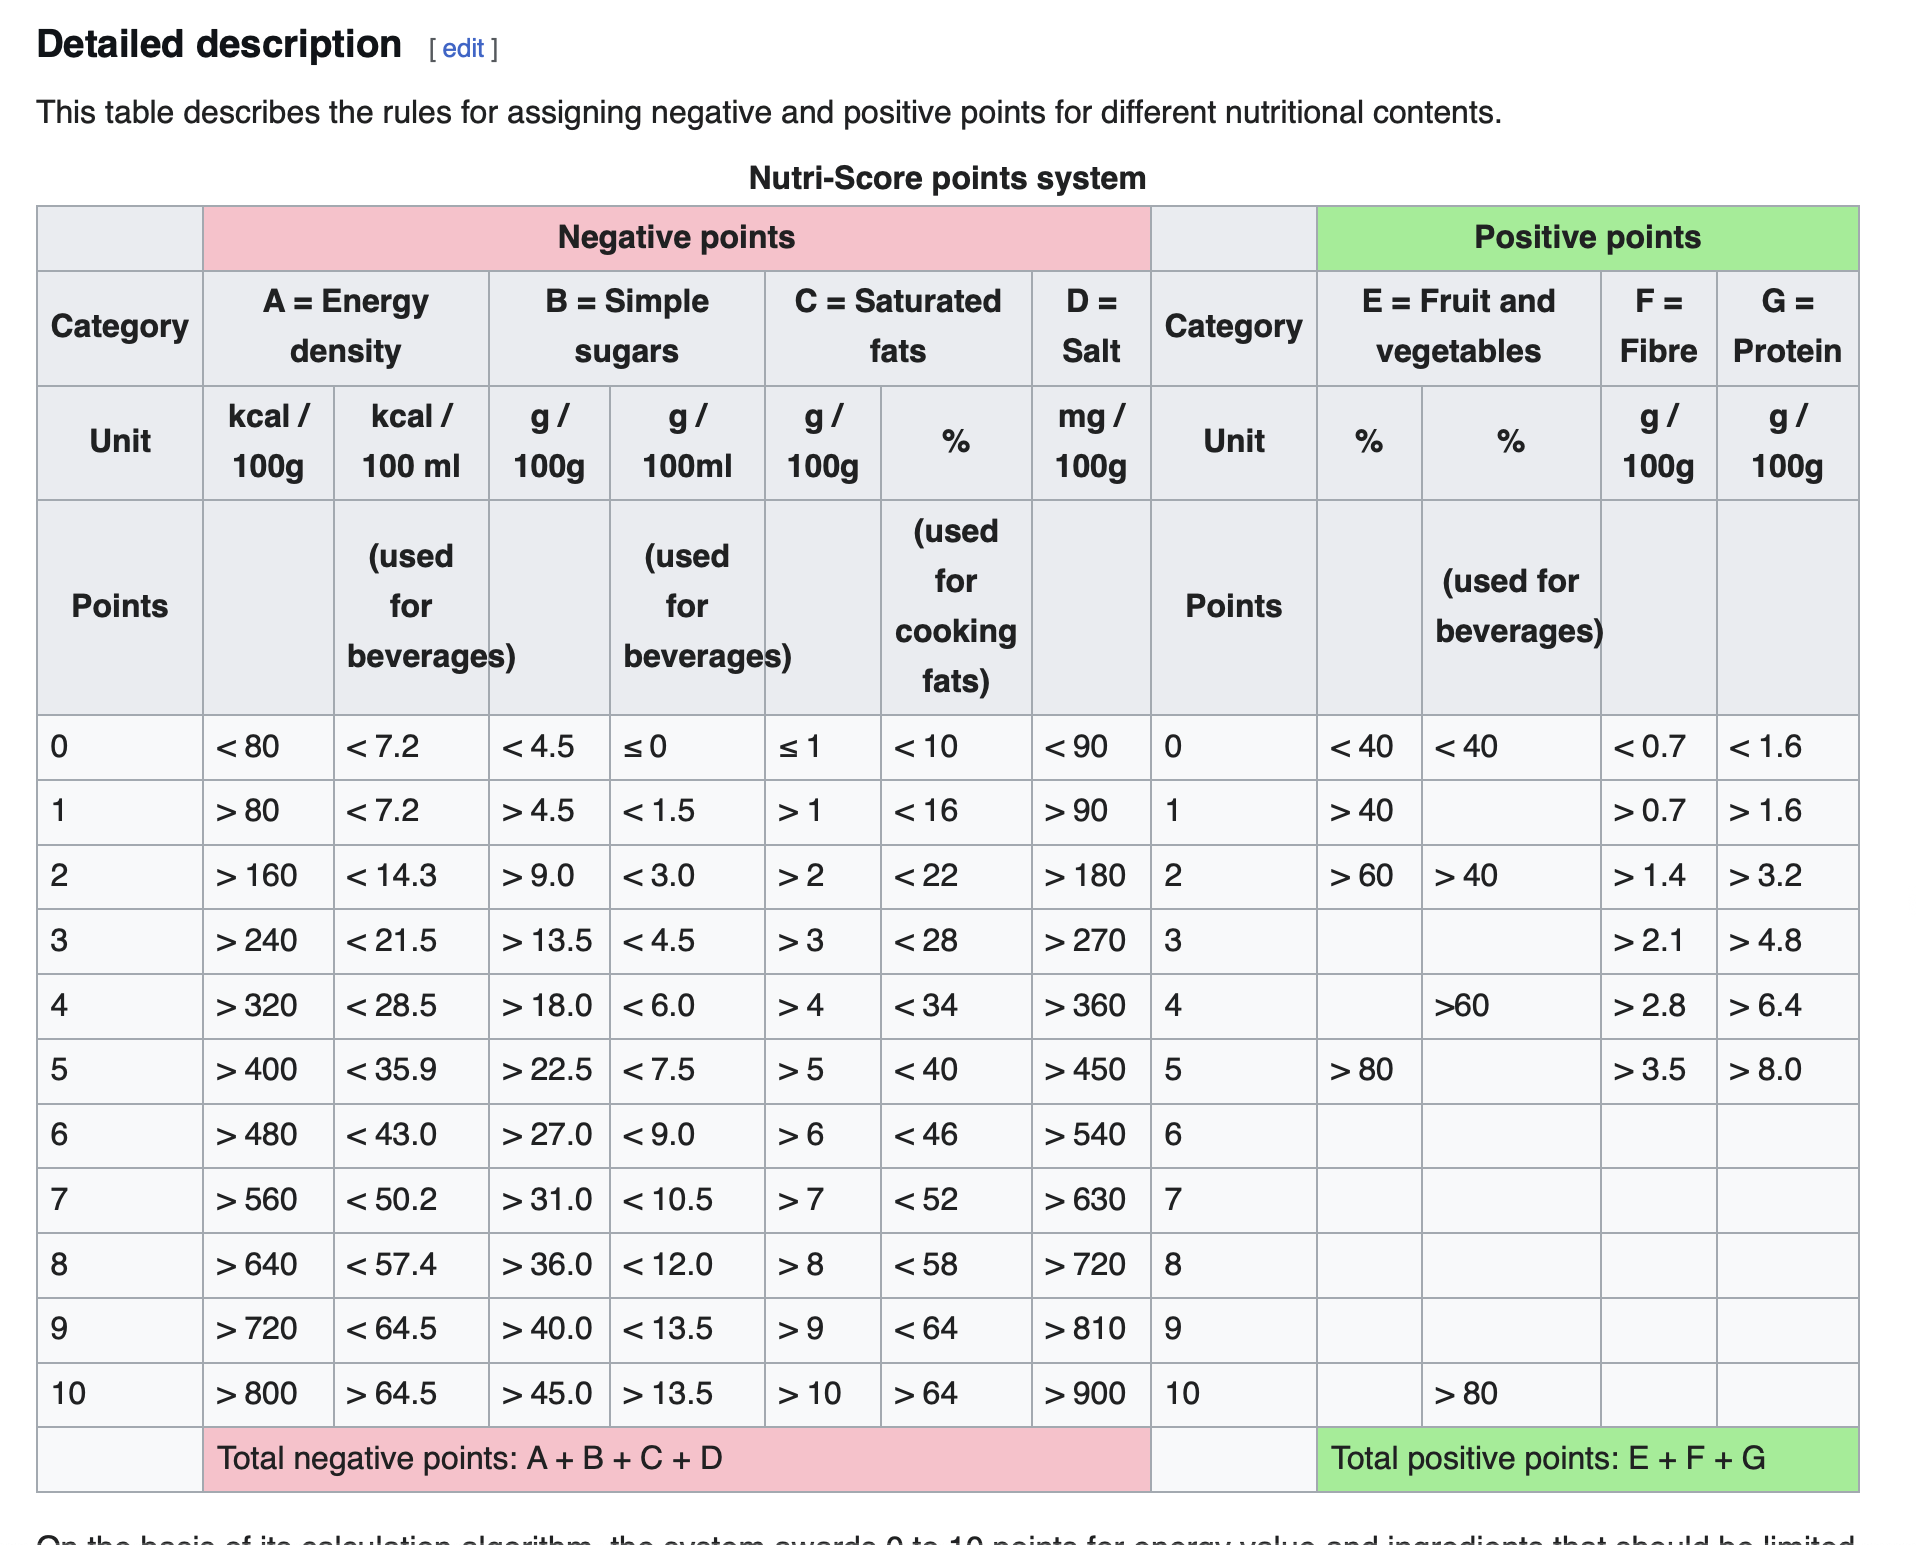

In [6]:
def nutri_score(calories, protein, total_fat, carbohydrate, sodium, saturated_fat, cholesterol,
                sugar, calcium, iron, potassium, vitamin_c, vitamin_e, vitamin_d):
    """
    Calculate the Nutri-Score for a food item based on the official formula with additional attributes.
    Arguments are all per 100g of food.
    Returns: Nutri-Score (integer)
    """

    # Negative points (unhealthy attributes)
    negative_points = 0

    # Calories (per 100g)
    if calories > 800: negative_points += 10
    elif calories > 700: negative_points += 9
    elif calories > 600: negative_points += 8
    elif calories > 500: negative_points += 7
    elif calories > 400: negative_points += 6
    elif calories > 300: negative_points += 5
    elif calories > 200: negative_points += 4
    elif calories > 100: negative_points += 3
    elif calories > 50: negative_points += 2
    elif calories > 0: negative_points += 1

    # Sugar (g/100g)
    if sugar > 45: negative_points += 10
    elif sugar > 40: negative_points += 9
    elif sugar > 36: negative_points += 8
    elif sugar > 31: negative_points += 7
    elif sugar > 27: negative_points += 6
    elif sugar > 22.5: negative_points += 5
    elif sugar > 18: negative_points += 4
    elif sugar > 13.5: negative_points += 3
    elif sugar > 9: negative_points += 2
    elif sugar > 4.5: negative_points += 1

    # Saturated Fat (g/100g)
    if saturated_fat > 10: negative_points += 10
    elif saturated_fat > 9: negative_points += 9
    elif saturated_fat > 8: negative_points += 8
    elif saturated_fat > 7: negative_points += 7
    elif saturated_fat > 6: negative_points += 6
    elif saturated_fat > 5: negative_points += 5
    elif saturated_fat > 4: negative_points += 4
    elif saturated_fat > 3: negative_points += 3
    elif saturated_fat > 2: negative_points += 2
    elif saturated_fat > 1: negative_points += 1

    # Sodium (mg/100g)
    if sodium > 900: negative_points += 10
    elif sodium > 800: negative_points += 9
    elif sodium > 700: negative_points += 8
    elif sodium > 600: negative_points += 7
    elif sodium > 500: negative_points += 6
    elif sodium > 400: negative_points += 5
    elif sodium > 300: negative_points += 4
    elif sodium > 200: negative_points += 3
    elif sodium > 100: negative_points += 2
    elif sodium > 0: negative_points += 1

    # Total Fat (g/100g)
    if total_fat > 30: negative_points += 10
    elif total_fat > 25: negative_points += 8
    elif total_fat > 20: negative_points += 6
    elif total_fat > 15: negative_points += 4
    elif total_fat > 10: negative_points += 2
    elif total_fat > 5: negative_points += 1

    # Cholesterol (mg/100g)
    if cholesterol > 300: negative_points += 5
    elif cholesterol > 200: negative_points += 4
    elif cholesterol > 150: negative_points += 3
    elif cholesterol > 100: negative_points += 2
    elif cholesterol > 50: negative_points += 1

    # Carbohydrates (g/100g)
    if carbohydrate > 60: negative_points += 10
    elif carbohydrate > 50: negative_points += 8
    elif carbohydrate > 40: negative_points += 6
    elif carbohydrate > 30: negative_points += 4
    elif carbohydrate > 20: negative_points += 2
    elif carbohydrate > 10: negative_points += 1

    # Positive points (healthy attributes)
    positive_points = 0

    # Protein (g/100g)
    if protein >= 8: positive_points += 5
    elif protein >= 6: positive_points += 4
    elif protein >= 4: positive_points += 3
    elif protein >= 2: positive_points += 2
    elif protein > 0: positive_points += 1

    # Calcium (mg/100g)
    if calcium >= 400: positive_points += 5
    elif calcium >= 300: positive_points += 4
    elif calcium >= 200: positive_points += 3
    elif calcium >= 100: positive_points += 2
    elif calcium > 0: positive_points += 1

    # Iron (mg/100g)
    if iron >= 8: positive_points += 5
    elif iron >= 6: positive_points += 4
    elif iron >= 4: positive_points += 3
    elif iron >= 2: positive_points += 2
    elif iron > 0: positive_points += 1

    # Potassium (mg/100g)
    if potassium >= 700: positive_points += 5
    elif potassium >= 600: positive_points += 4
    elif potassium >= 500: positive_points += 3
    elif potassium >= 400: positive_points += 2
    elif potassium > 0: positive_points += 1

    # Vitamins (C, E, D)
    if vitamin_c >= 30: positive_points += 3
    if vitamin_e >= 5: positive_points += 2
    if vitamin_d >= 5: positive_points += 3

    # Final Nutri-Score
    return negative_points - positive_points

In [7]:
tot_scores = new_nutrients.apply(nutri_score, "Calories", "Protein", "TotalFat", "Carbohydrate", "Sodium", "SaturatedFat", "Cholesterol",
                    "Sugar", "Calcium", "Iron", "Potassium", "VitaminC", "VitaminE", "VitaminD")

# Exploring the Distributions of Scores

After cleaning and preparing the data, I conduct exploratory data analysis on the elements of Nutri-Score, which are the negative and positive scores. Moreover, I want to see if there is a stark difference between negative and positive scores or if one element of the Nutri-Score has a "unique" or "unexpected" distribution.

To begin the EDA process, I first retrieved the negative and positive scores. Thus, I split the `nutri_score` function into `neg_score` and `pos_score` functions.

In [8]:
# Splitting the nutri_score function to obtain negative and positive scores

def neg_score(calories, protein, total_fat, carbohydrate, sodium, saturated_fat, cholesterol,
              sugar, calcium, iron, potassium, vitamin_c, vitamin_e, vitamin_d):
    negative_points = 0

    if calories > 800: negative_points += 10
    elif calories > 700: negative_points += 9
    elif calories > 600: negative_points += 8
    elif calories > 500: negative_points += 7
    elif calories > 400: negative_points += 6
    elif calories > 300: negative_points += 5
    elif calories > 200: negative_points += 4
    elif calories > 100: negative_points += 3
    elif calories > 50: negative_points += 2
    elif calories > 0: negative_points += 1

    if sugar > 45: negative_points += 10
    elif sugar > 40: negative_points += 9
    elif sugar > 36: negative_points += 8
    elif sugar > 31: negative_points += 7
    elif sugar > 27: negative_points += 6
    elif sugar > 22.5: negative_points += 5
    elif sugar > 18: negative_points += 4
    elif sugar > 13.5: negative_points += 3
    elif sugar > 9: negative_points += 2
    elif sugar > 4.5: negative_points += 1

    if saturated_fat > 10: negative_points += 10
    elif saturated_fat > 9: negative_points += 9
    elif saturated_fat > 8: negative_points += 8
    elif saturated_fat > 7: negative_points += 7
    elif saturated_fat > 6: negative_points += 6
    elif saturated_fat > 5: negative_points += 5
    elif saturated_fat > 4: negative_points += 4
    elif saturated_fat > 3: negative_points += 3
    elif saturated_fat > 2: negative_points += 2
    elif saturated_fat > 1: negative_points += 1

    if sodium > 900: negative_points += 10
    elif sodium > 800: negative_points += 9
    elif sodium > 700: negative_points += 8
    elif sodium > 600: negative_points += 7
    elif sodium > 500: negative_points += 6
    elif sodium > 400: negative_points += 5
    elif sodium > 300: negative_points += 4
    elif sodium > 200: negative_points += 3
    elif sodium > 100: negative_points += 2
    elif sodium > 0: negative_points += 1

    if total_fat > 30: negative_points += 10
    elif total_fat > 25: negative_points += 8
    elif total_fat > 20: negative_points += 6
    elif total_fat > 15: negative_points += 4
    elif total_fat > 10: negative_points += 2
    elif total_fat > 5: negative_points += 1

    if cholesterol > 300: negative_points += 5
    elif cholesterol > 200: negative_points += 4
    elif cholesterol > 150: negative_points += 3
    elif cholesterol > 100: negative_points += 2
    elif cholesterol > 50: negative_points += 1

    if carbohydrate > 60: negative_points += 10
    elif carbohydrate > 50: negative_points += 8
    elif carbohydrate > 40: negative_points += 6
    elif carbohydrate > 30: negative_points += 4
    elif carbohydrate > 20: negative_points += 2
    elif carbohydrate > 10: negative_points += 1
    
    return negative_points

def pos_score(calories, protein, total_fat, carbohydrate, sodium, saturated_fat, cholesterol,
              sugar, calcium, iron, potassium, vitamin_c, vitamin_e, vitamin_d):
    positive_points = 0

    if protein >= 8: positive_points += 5
    elif protein >= 6: positive_points += 4
    elif protein >= 4: positive_points += 3
    elif protein >= 2: positive_points += 2
    elif protein > 0: positive_points += 1

    if calcium >= 400: positive_points += 5
    elif calcium >= 300: positive_points += 4
    elif calcium >= 200: positive_points += 3
    elif calcium >= 100: positive_points += 2
    elif calcium > 0: positive_points += 1

    if iron >= 8: positive_points += 5
    elif iron >= 6: positive_points += 4
    elif iron >= 4: positive_points += 3
    elif iron >= 2: positive_points += 2
    elif iron > 0: positive_points += 1

    if potassium >= 700: positive_points += 5
    elif potassium >= 600: positive_points += 4
    elif potassium >= 500: positive_points += 3
    elif potassium >= 400: positive_points += 2
    elif potassium > 0: positive_points += 1

    if vitamin_c >= 30: positive_points += 3
    if vitamin_e >= 5: positive_points += 2
    if vitamin_d >= 5: positive_points += 3
    
    return positive_points

In [9]:
# Obtaining the negative and positive scores, then creating a new table that contains all components of the Nutri-Score.

neg_scores = new_nutrients.apply(neg_score, "Calories", "Protein", "TotalFat", "Carbohydrate", "Sodium", "SaturatedFat", "Cholesterol",
                    "Sugar", "Calcium", "Iron", "Potassium", "VitaminC", "VitaminE", "VitaminD")

pos_scores = new_nutrients.apply(pos_score, "Calories", "Protein", "TotalFat", "Carbohydrate", "Sodium", "SaturatedFat", "Cholesterol",
                    "Sugar", "Calcium", "Iron", "Potassium", "VitaminC", "VitaminE", "VitaminD")

scores_tbl = Table().with_columns(
    "ID", new_nutrients.column("ID"),
    "Negative", neg_scores,
    "Positive", pos_scores,
    "Total", tot_scores
)

scores_tbl

ID,Negative,Positive,Total
1001,41,4,37
1002,42,4,38
1003,35,3,32
1004,34,12,22
1005,30,12,18
1006,31,9,22
1007,30,11,19
1008,31,12,19
1009,35,12,23
1010,34,12,22


The next step is to visualize the distributions of these scores. Since I want see how these scores are distributed, creating histograms would get the job done. Thus, I will create a histogram for each component of the Nutri-Score while adjusting the bins to obtain cleaner, more precise distributions of scores.

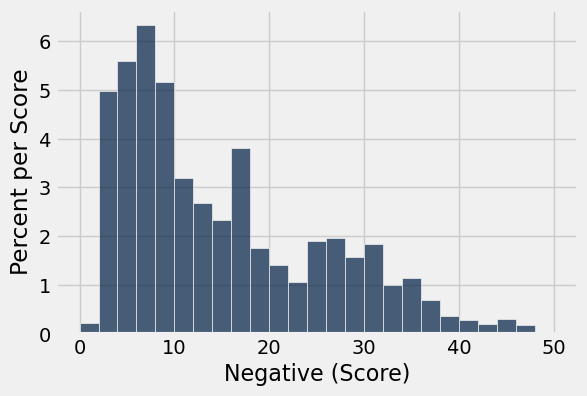

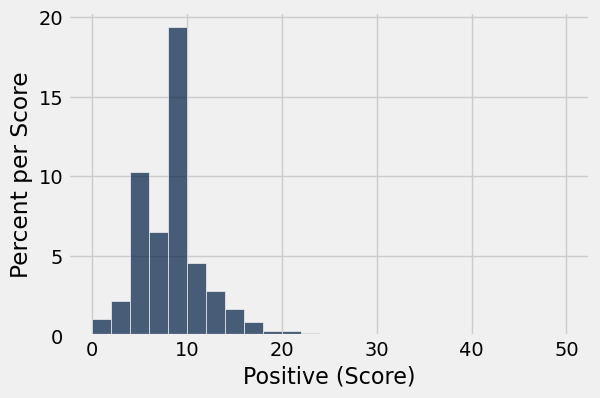

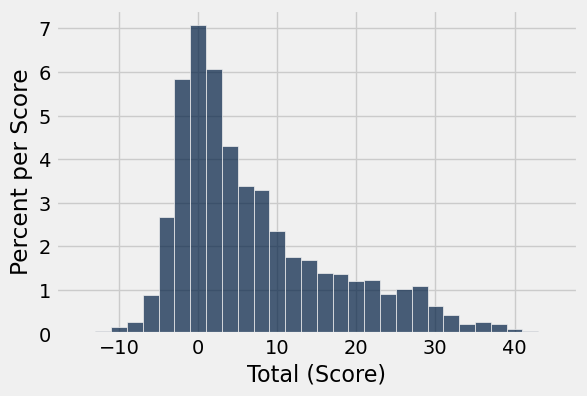

In [10]:
scores_tbl.hist("Negative", unit="Score", bins=np.arange(0,51,2))
scores_tbl.hist("Positive", unit="Score", bins=np.arange(0,51,2))
scores_tbl.hist("Total", unit="Score", bins=np.arange(-15,46,2))

The distributions of negative and positive scores differ in an interesting way. While the negative scores are skewed to the right, the positive scores are roughly bell-shaped. This proves the shape of the distribution of total scores because the majority of total scores would be positive. Since this is the case, I questioned if there was a difference in positive scores between junk foods and non-junk foods because the median negative _and_ positive scores sat around 10. Ultimately, this led me into the inference phase of my project to conduct an A/B test.


But before I move into the inference phase, I have to first create labels for foods that are junk or non-junk. To do this, I will define `junk_detector`, which takes in a numerical array, to iterate through each numerical element. If the number is greater than 0, it is "Junk Food," with the latter being labeled as "Not Junk Food."

In [11]:
def junk_detector(num_arr):
    """
    Iterate through each element of a numerical array,
    appending "Junk Food" or "Not Junk Food" depending 
    on the condition met into an empty array.
    """
    labels = []
    for i in num_arr:
        if i > 0:
            labels.append("Junk Food")
        else:
            labels.append("Not Junk Food")
    return np.array(labels)

In [12]:
label_col = junk_detector(scores_tbl.column("Total"))

# Drawing Conclusions about Positive Scores Between Junk vs. Non-Junk

The plan for the inference phase of this project is to conduct a full A/B test. Here are the steps I need to take to achieve this:

1. Define the null and alternative hypotheses and choose a test statistic and significance level.
2. Calculate the observed statistic.
3. Define functions to shuffle labels and calculate a test statistic.
4. Utilize functions from Step 3 to create an A/B test function with a large number of repetitions
5. Calculate the p-value, then draw a conclusion.

In [13]:
scores_with_labels = scores_tbl.with_column("Label", label_col)
scores_with_labels

ID,Negative,Positive,Total,Label
1001,41,4,37,Junk Food
1002,42,4,38,Junk Food
1003,35,3,32,Junk Food
1004,34,12,22,Junk Food
1005,30,12,18,Junk Food
1006,31,9,22,Junk Food
1007,30,11,19,Junk Food
1008,31,12,19,Junk Food
1009,35,12,23,Junk Food
1010,34,12,22,Junk Food


The first step is to define the null and alternative hypotheses and to choose my test statistic and significance level. Since I want to see if there is a difference in positive scores between junk foods and non-junk foods, my test statistic should be the absolute difference in mean. Lastly, my signficance level will be at 10%, or 0.1.

**Null Hypothesis:** There is no difference in mean positive score between junk foods and non-junk foods in the sample. Any observed difference is due to chance.
**Alternative Hypothesis:** The positive scores of non-junk foods are higher than the positive scores of junk foods. Any observed difference is not due to chance.

**Test Statistic:** Absolute difference in mean

**Significance Level:** 10%, or 0.1

Before I move on to creating the simulation function for the A/B test, I need to first calculate the observed statistic, which will be key to calculating the p-value. Any test statistic that is as extreme or more extreme than the observed statistic will contribute towards the p-value.

In [14]:
# Taking positive scores from both labels and using them to calculate the absolute difference in mean

not_junk_col = scores_with_labels.where("Label", "Not Junk Food").column("Positive")
junk_col = scores_with_labels.where("Label", "Junk Food").column("Positive")
obs_stat = abs(np.mean(not_junk_col) - np.mean(junk_col))
obs_stat

0.0412411576852314

After calculating the observed statistic, I can now begin the creation of the A/B test simulation function. The start to every A/B test is to shuffle the labels of the dataset. Once I shuffle the dataset's labels and add it as a new column to the dataset, I can calculate the test statistic using the shuffled labels. Finally, I will append the newly acquired test statistic into an empty array that will be used to calculate the p-value.

In [15]:
def one_shuffle(label_col):
    """
    Takes in a label column, shuffles it,
    and adds it back into the dataset as a new column.
    """
    shuffled_labels = scores_with_labels.sample(with_replacement=False).column(label_col)
    new_tbl = scores_with_labels.with_column("Shuffled Labels", shuffled_labels)
    return new_tbl

def one_test_stat(tbl):
    """
    Takes in a table, filters it by the shuffled labels,
    and calculates an absolute difference in mean.
    """
    not_junk_col = tbl.where("Shuffled Labels", "Not Junk Food").column("Positive")
    junk_col = tbl.where("Shuffled Labels", "Junk Food").column("Positive")
    test_stat = abs(np.mean(not_junk_col) - np.mean(junk_col))
    return test_stat

def ab_test():
    """
    Utilizes one_shuffle and one_test_stat to
    calculate 1000 test statistics.
    """
    test_stats = []
    for i in np.arange(1000):
        new_tbl = one_shuffle("Label")
        test_stat = one_test_stat(new_tbl)
        test_stats.append(test_stat)
    return np.array(test_stats)

In [16]:
test_stats = ab_test()
test_stats

array([  3.33186155e-02,   1.25278868e-01,   1.40710708e-02,
         3.17632204e-02,   5.32465449e-02,   2.54445956e-02,
         9.62131939e-02,   1.47029333e-02,   1.41075430e-01,
         3.68181203e-02,   1.70096163e-04,   5.66975275e-02,
         9.81087813e-02,   4.34284153e-02,   5.95651697e-02,
         8.95543767e-02,   1.21754834e-02,   1.84941082e-02,
         1.87857784e-02,   5.19828199e-02,   3.64779280e-02,
         5.89333073e-02,   9.24220190e-02,   6.52519321e-02,
         5.22744901e-02,   1.41707293e-01,   2.35735378e-03,
         9.81087813e-02,   5.83014448e-02,   9.84004515e-02,
         9.71367265e-02,   1.02798959e-02,   3.07911656e-02,
         1.24306813e-01,   9.05264315e-02,   5.57739948e-02,
         2.79720455e-02,   7.12058350e-03,   9.17901565e-02,
         9.77685890e-02,   1.12034286e-02,   6.27244822e-02,
         1.81539159e-02,   4.59558652e-02,   3.45823405e-02,
         4.62960576e-02,   6.04887024e-02,   7.40980069e-02,
         2.10215582e-02,

This is the final step of the A/B test. First and foremost, my p-value will be right-tailed because any test statistic that is as extreme or or more extreme than the observed test statistic will contribute towards the p-value. With that being said, I will use `np.count_nonzero` to obtain the total count of test statistics that are greater than or equal to the observed statistic. Finally, I will divide the count by 1000, which is the length of the array of test statistics.

In [17]:
p_value = np.count_nonzero(test_stats >= obs_stat) / 1000
p_value

0.607

At the p-value of 0.607, I fail to reject the null hypothesis at the significance level of 0.1. Thus, there is strong evidence to suggest that there is no difference in mean positive score between junk foods and non-junk foods in the sample. In other words, there is no statistically significant relationship between the positive scores of junk and non-junk foods.

# Predicting Whether a Food is Junk or Not Given Its Nutri-Score

This is the prediction phase of this project. I want to develop and test an alternative to the Nutri-Score model, which is a k-NN classification model. To achieve this, I need to first visualize negative vs. positive scores with their respective labels to observe a possible decision boundary.

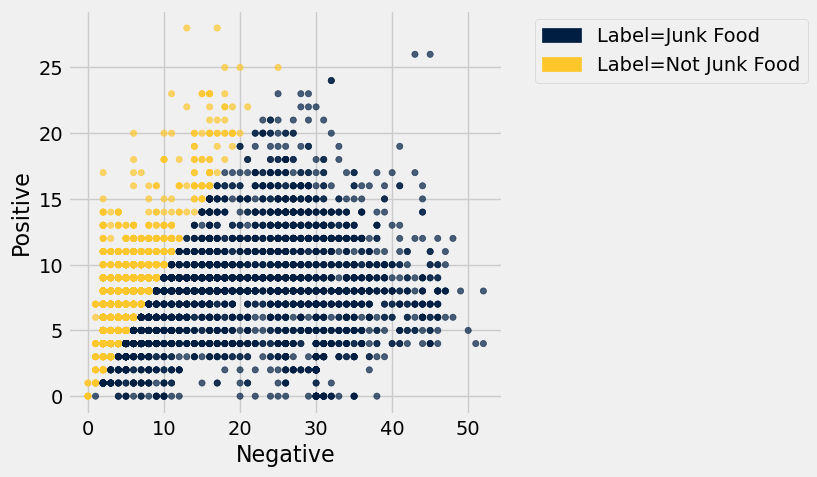

In [27]:
scores_with_labels.scatter("Negative", "Positive", group="Label")

Looking from the scatter plot, the decision boundary resembles a linear line, which indicates that there is an accurate separation of the different labels in the data. This is an ideal scenario for k-NN classification because the boundaries between junk vs. non-junk is clearly defined, which may lead to the model producing a high accuracy.

I will now proceed to develop the k-NN classification model, which begins by resampling the dataset then splitting them into training and testing sets. I will have 80% of the data as `train` and 20% of the data as `test`.

In [19]:
# Resampling the dataset and splitting it into training and testing sets

knn_prep = scores_with_labels.sample(with_replacement=False)
train = knn_prep.take(np.arange(0, 5646))
test = knn_prep.take(np.arange(5646, 7058))

Once the training and testing sets are defined, I must define a function that will compute a testing entry's distance from every training entry, which is called the Euclidean distance. I will also need to define the features that I will use to classify a testing entry as either "Junk Food" or "Not Junk Food," which are `Negative` and `Positive`.

In [20]:
def distance(arr1, arr2):
    return np.sqrt(np.sum((arr1 - arr2)**2))

features = make_array("Negative", "Positive")

Now comes the main part of the k-NN classification model. Before I start to compute Euclidean distances, I first need to define a function that will convert a row to an array of its features so it is possible for the classification model to make calculations. Finally, the k-NN classification model will come down to these steps:

1. Convert the testing entry into an array of its features.
2. Compute the Euclidean distance between the testing entry and every training entry.
   - Store each Euclidean distance into an empty array.
3. Add the array of Euclidean distances into the training set as a new column.
4. Sort the distance column by ascending order and take the first k rows.
5. Group the filtered table by the label column, sort the count by descending order, and retrieve the first label.

In [21]:
def row_to_array(row, features):
    """
    Converts a row to an array of its features.
    """
    arr = []
    for feature in features:
        arr.append(row.item(feature))
    return np.array(arr)

def classify(test_row, k, train):
    """
    Takes k nearest neighbors of the testing entry
    with respect to every training entry by computing
    Euclidean distances and returning the label with the
    highest counts.
    """
    test_row_features_array = row_to_array(test_row, features)
    
    distances = []
    for train_row in train.rows:
        train_row_features_array = row_to_array(train_row, features)
        row_distance = distance(test_row_features_array, train_row_features_array)
        distances.append(row_distance)
    np.array(distances)
        
    train_with_distances = train.with_column("Distance", distances)
    nearest_neighbors = train_with_distances.sort("Distance").take(np.arange(k))
    most_common_label = nearest_neighbors.group("Label").sort("count", descending=True).column("Label").item(0)
    return most_common_label

In [22]:
first_test = classify(test.row(0), 5, train)
first_test

'Junk Food'

Since the decision boundary is virtually a straight line, I should take `k` as the smallest odd number that is not 1, which is 3. And with that, I will evaluate its accuracy with respect to the labels assigned by the Nutri-Score formula.

In [26]:
def three_classify(row):
    return classify(row, 3, train)

test_with_prediction = test.with_column("Prediction", test.apply(three_classify))
labels_correct = test_with_prediction.column("Label") == test_with_prediction.column("Prediction")
accuracy = np.count_nonzero(labels_correct) / test_with_prediction.num_rows
accuracy

0.9992917847025495

The 3-NN classifier model has an accuracy of 99.9%, which indicates that the 3-NN classifier model performs well with the testing set. However, an extremely high accuracy may also indicate signs of overfitting in the data, which I should keep in mind. An extension of this classifier model would be to use the nutrition attributes from `new_nutrients` and either predict its Nutri-Score or whether it is junk food or not junk food.